# Spam Filter Model

Develop a model to predict whether each email is spam or not, and use it to classify the uncategorized emails.

For this question we will be considering to use the LogisticRegression model to classify the messages as `Spam` or `Not Spam` 

We split the given Dataset into two groups `Train` and `Validation` dataset. 

We train the model on the training data set and evaluate the model using the validation dataset.

we will try to get better evaluation metric scores by tuning the hyperparameters of the model.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="dark")
import warnings
warnings.filterwarnings("ignore")

In [97]:
df = pd.read_csv("Email_Dataset.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,CATEGORY,MESSAGE
0,Spam,\n\nThe Internet's Online Pharmacy\n\n\n\nViag...
1,Spam,------=_NextPart_000_00B0_35C58D0E.D7267B06\n\...
2,Spam,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont..."
3,Spam,------=_NextPart_000_00E4_86E61E0A.B5488E11\n\...
4,Spam,BARRISTER ADEWALE COKER CHAMBERS\n\nLegal Prac...


In [98]:
df["CATEGORY"].value_counts()

CATEGORY
Not Spam    3104
Spam         896
Name: count, dtype: int64

In [99]:
data = df.where(pd.notnull(df), '')
data.head()

,CATEGORY,MESSAGE
0,Spam,\n\nThe Internet's Online Pharmacy\n\n\n\nViag...
1,Spam,------=_NextPart_000_00B0_35C58D0E.D7267B06\n\...
2,Spam,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont..."
3,Spam,------=_NextPart_000_00E4_86E61E0A.B5488E11\n\...
4,Spam,BARRISTER ADEWALE COKER CHAMBERS\n\nLegal Prac...


## Preprocessing the data

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [101]:
data["CATEGORY"] = data["CATEGORY"].map({"Spam":0,
                                         "Not Spam":1});

In [102]:
# Split the data into features and labels
X = data["MESSAGE"]
Y = data["CATEGORY"]

In [103]:
# Split the data into train and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X,
                                                     Y,
                                                     test_size=0.2,
                                                     random_state=42)

In [104]:
# Transfrom the text data to categorical featues 
feature_extraction = TfidfVectorizer(min_df=1,
                                     stop_words="english",
                                     lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_valid_features = feature_extraction.transform(X_valid)

In [170]:
pd.DataFrame(X_train_features)

,0
0,"(0, 30145)\t0.05900972612871462\n (0, 30966..."
1,"(0, 32913)\t0.01574695576341975\n (0, 39731..."
2,"(0, 47787)\t0.18774679505581945\n (0, 1289)..."
3,"(0, 30147)\t0.05416137690665461\n (0, 30916..."
4,"(0, 47463)\t0.08547187025413286\n (0, 15421..."
...,...
3195,"(0, 15949)\t0.8917937461108915\n (0, 33564)..."
3196,"(0, 23031)\t0.1422885494368582\n (0, 22106)..."
3197,"(0, 14172)\t0.07779173393465255\n (0, 23142..."
3198,"(0, 11256)\t0.08519006533634825\n (0, 29859..."


## Modelling

Since, this problem is closely related the classification type. We will be developing the classification models. 

The classification models we will be trying are:
1. LogisticRegression
2. RandomForestClassification
3. KNeighbors
4. GuassianNB

We will be tuning the hyperparameters of the two best model so that the model finds the patterns better and able to give the better evaluation scores. 

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 1. LogisticRegression Model

In [107]:
log_model = LogisticRegression()
log_model.fit(X_train_features, Y_train)

LogisticRegression()

In [108]:
log_model_score =log_model.score(X_valid_features, Y_valid)
log_model_score

0.95

### Tuning the Hyperparameters of LogisticRegression Model

In [109]:
from sklearn.model_selection import GridSearchCV
# After tuning the hyperparameters with GridSearch the best params are:
gs_log_grid = {'C':[1000],
           'penalty':['l1', 'l2'],
           'solver':["saga","lbfgs"],
           'max_iter':[5000, 10000]}
gs_log_model = GridSearchCV(LogisticRegression(random_state=42),
                    param_grid=gs_log_grid,
                    cv=3,
                    verbose=True)
gs_log_model.fit(X_train_features, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1000], 'max_iter': [5000, 10000],
                         'penalty': ['l1', 'l2'], 'solver': ['saga', 'lbfgs']},
             verbose=True)

In [110]:
gs_log_model.best_params_

{'C': 1000, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}

In [111]:
gs_log_model.score(X_valid_features, Y_valid)

0.99125

In [112]:
Y_preds = gs_log_model.predict(X_valid_features)
Y_preds

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

### Evalution with LogisticRegression Model

We will be evaluating the model on the validation set.

The evaluation metrics we will be considering are:
* Accuracy Score
* Precision: Measures the accuracy of the positive predictions.
* Recall: Measures the ability of the model to capture all the positive instances.
* F1-Score: Harmonic mean of precision and recall, providing a single metric that balances both concerns.
* Confusion Matrix

In [113]:
log_preds = gs_log_model.predict(X_valid_features)
log_model_accuracy_score = accuracy_score(Y_valid, log_preds)
log_model_precision_score = precision_score(Y_valid, log_preds, average = "weighted")
log_model_recall_score = recall_score(Y_valid, log_preds, average = "weighted")
log_model_f1_score = f1_score(Y_valid, log_preds, average = "weighted")

print(f"The LogisticRegression model accuracy Score is: {log_model_accuracy_score*100:.2f}%")
print(f"The LogisticRegression model precision Score is: {log_model_precision_score*100:.2f}%")
print(f"The LogisticRegression model recall Score is: {log_model_recall_score*100:.2f}%")
print(f"The LogisticRegression model f1 Score is: {log_model_f1_score*100:.2f}%")

The LogisticRegression model accuracy Score is: 99.12%
The LogisticRegression model precision Score is: 99.12%
The LogisticRegression model recall Score is: 99.12%
The LogisticRegression model f1 Score is: 99.12%


In [114]:
print(classification_report(Y_valid, Y_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       197
           1       0.99      1.00      0.99       603

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



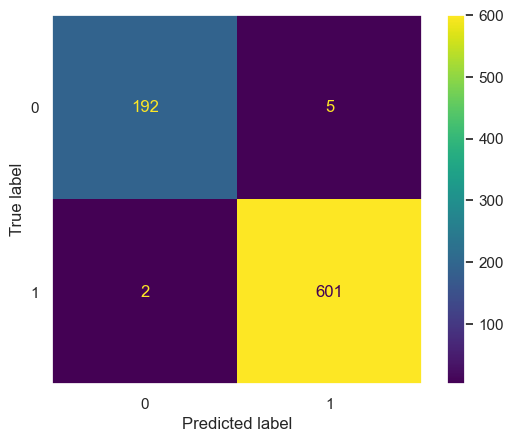

In [115]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_log_model,
                                      X=X_valid_features,
                                      y=Y_valid);

## 2. RandomForestClassifier Model

In [116]:
# Fit the RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train_features, Y_train)

RandomForestClassifier()

In [117]:
model.score(X_valid_features, Y_valid)

0.96625

### Tuning the hyperparameters of RandomForestClassifier Model

In [118]:
from sklearn.model_selection import GridSearchCV
gs_rf_grid = {"n_estimators":[100, 120],
              "min_samples_split":[4, 6],
              "min_samples_leaf": [4, 6]}
gs_rf_model = GridSearchCV(RandomForestClassifier(n_jobs=-1,
                                               random_state=42),
                        param_grid=gs_rf_grid,
                        cv=3,
                        verbose=True)
gs_rf_model.fit(X_train_features, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 120]},
             verbose=True)

In [119]:
gs_rf_model.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 120}

In [120]:
gs_rf_model.score(X_valid_features, Y_valid)

0.95

In [121]:
Y_preds = gs_rf_model.predict(X_valid_features)
Y_preds

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

### Evalution with RandomForestClassifer Model

In [122]:
rf_preds = gs_rf_model.predict(X_valid_features)
gs_model_accuracy_score = accuracy_score(Y_valid, rf_preds)
gs_model_precision_score = precision_score(Y_valid, rf_preds, average="weighted")
gs_model_recall_score = recall_score(Y_valid, rf_preds, average="weighted")
gs_model_f1_score = f1_score(Y_valid, rf_preds, average="weighted")

print(f"The RandomForestClasiifier model accuracy Score is: {gs_model_accuracy_score*100:.2f}%")
print(f"The RandomForestClasiifier model precision Score is: {gs_model_precision_score*100:.2f}%")
print(f"The RandomForestClasiifier model recall Score is: {gs_model_recall_score*100:.2f}%")
print(f"The RandomForestClasiifier model f1 Score is: {gs_model_f1_score*100:.2f}%")

The RandomForestClasiifier model accuracy Score is: 95.00%
The RandomForestClasiifier model precision Score is: 95.10%
The RandomForestClasiifier model recall Score is: 95.00%
The RandomForestClasiifier model f1 Score is: 94.85%


In [123]:
print(classification_report(Y_valid, Y_preds))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       197
           1       0.94      0.99      0.97       603

    accuracy                           0.95       800
   macro avg       0.96      0.91      0.93       800
weighted avg       0.95      0.95      0.95       800



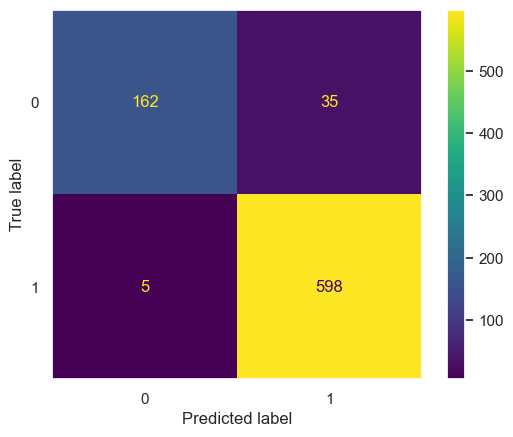

In [124]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_rf_model,
                                      X=X_valid_features,
                                      y=Y_valid);

## 3. KNearest Neighbors Model

In [125]:
np.random.seed(42)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_features, Y_train)

KNeighborsClassifier()

In [126]:
knn_model_score = knn_model.score(X_valid_features, Y_valid)
knn_model_score

0.97875

### Tuning the hyperparameters of KNN Model

In [127]:
np.random.seed(42)
gs_knn_grid = {"n_neighbors": [4],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}
gs_knn_model = GridSearchCV(KNeighborsClassifier(),
                            param_grid=gs_knn_grid,
                            cv=3,
                            verbose=True)
gs_knn_model.fit(X_train_features, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [4],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [128]:
gs_knn_model.best_params_

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}

In [129]:
gs_knn_model.score(X_valid_features, Y_valid)

0.97875

In [130]:
Y_preds = gs_knn_model.predict(X_valid_features)
Y_preds

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

### Evalution with KNN Model

In [131]:
knn_preds = gs_knn_model.predict(X_valid_features)
knn_model_accuracy_score = accuracy_score(Y_valid, knn_preds)
knn_model_precision_score = precision_score(Y_valid, knn_preds, average = "weighted")
knn_model_recall_score = recall_score(Y_valid, knn_preds, average = "weighted")
knn_model_f1_score = f1_score(Y_valid, knn_preds, average = "weighted")

print(f"The KNN model acuracy Score is: {knn_model_accuracy_score*100:.2f}%")
print(f"The KNN model precision Score is: {knn_model_precision_score*100:.2f}%")
print(f"The KNN model recall Score is: {knn_model_recall_score*100:.2f}%")
print(f"The KNN model f1 Score is: {knn_model_f1_score*100:.2f}%")

The KNN model acuracy Score is: 97.88%
The KNN model precision Score is: 97.88%
The KNN model recall Score is: 97.88%
The KNN model f1 Score is: 97.88%


In [132]:
print(classification_report(Y_valid, Y_preds))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       197
           1       0.99      0.99      0.99       603

    accuracy                           0.98       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.98      0.98      0.98       800



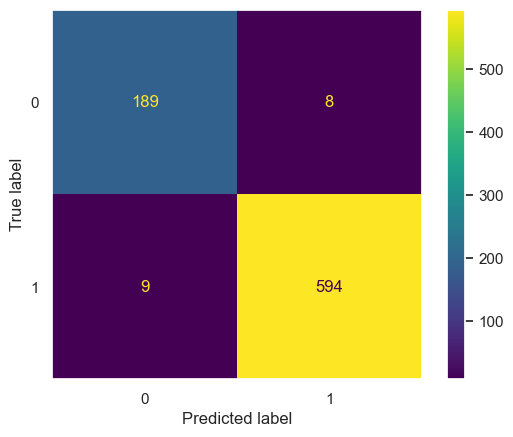

In [133]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_knn_model,
                                      X=X_valid_features,
                                      y=Y_valid);

## 4. GaussianNB (NaiveBayes) Classifier Model

In [134]:
np.random.seed(42)
gnb_model = GaussianNB()
gnb_model.fit(X_train_features.toarray(), Y_train)

GaussianNB()

In [136]:
gnb_model_score = gnb_model.score(X_valid_features.toarray(), Y_valid)
gnb_model_score

0.97125

### Tuning the hyperparameters of GaussianNB Model

In [137]:
np.random.seed(42)
gnb_grid = {'var_smoothing': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
gs_gnb_model = GridSearchCV(GaussianNB(),
                            param_grid=gnb_grid,
                            cv=3,
                            verbose=True)
gs_gnb_model.fit(X_train_features.toarray(), Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                           0.01, 0.1, 1, 10, 100]},
             verbose=True)

In [138]:
gs_gnb_model.best_params_

{'var_smoothing': 0.0001}

In [139]:
gs_gnb_model.score(X_valid_features.toarray(), Y_valid)

0.98625

In [140]:
Y_preds = gs_gnb_model.predict(X_valid_features.toarray())
Y_preds

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,

### Evalution with KNN Model

In [141]:
gnb_preds = gs_gnb_model.predict(X_valid_features.toarray())
gnb_model_accuracy_score = accuracy_score(Y_valid, gnb_preds)
gnb_model_precision_score = precision_score(Y_valid, gnb_preds, average = "weighted")
gnb_model_recall_score = recall_score(Y_valid, gnb_preds, average = "weighted")
gnb_model_f1_score = f1_score(Y_valid, gnb_preds, average = "weighted")

print(f"The GaussianNB model acuracy Score is: {gnb_model_accuracy_score*100:.2f}%")
print(f"The GaussianNB model precision Score is: {gnb_model_precision_score*100:.2f}%")
print(f"The GaussianNB model recall Score is: {gnb_model_recall_score*100:.2f}%")
print(f"The GaussianNB model f1 Score is: {gnb_model_f1_score*100:.2f}%")

The GaussianNB model acuracy Score is: 98.62%
The GaussianNB model precision Score is: 98.62%
The GaussianNB model recall Score is: 98.62%
The GaussianNB model f1 Score is: 98.62%


In [142]:
print(classification_report(Y_valid, Y_preds))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       197
           1       0.99      1.00      0.99       603

    accuracy                           0.99       800
   macro avg       0.99      0.98      0.98       800
weighted avg       0.99      0.99      0.99       800



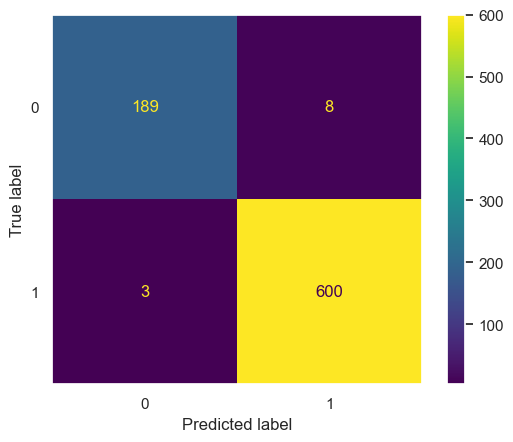

In [143]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_gnb_model,
                                      X=X_valid_features.toarray(),
                                      y=Y_valid);

## Evaluation Metrics DataFrame

In [150]:
metrics_df = pd.DataFrame()
metric = ["Accuracy", "Precision", "Recall", "F1"]
log_model_scores = [log_model_accuracy_score, log_model_precision_score, log_model_recall_score, log_model_f1_score]
random_forest_model_scores = [gs_model_accuracy_score, gs_model_precision_score, gs_model_recall_score, gs_model_f1_score]
knn_model_scores = [knn_model_accuracy_score, knn_model_precision_score, knn_model_recall_score, knn_model_f1_score]
gnb_model_scores = [gnb_model_accuracy_score, gnb_model_precision_score, gnb_model_recall_score, gnb_model_f1_score]
metrics_df["Metric"] = metric
metrics_df["LogisticClassification"] = log_model_scores
metrics_df["RandomForest Model"] = random_forest_model_scores
metrics_df["KNN Model"] = knn_model_scores
metrics_df["GaussianNB Model"] = gnb_model_scores
metrics_df

,Metric,LogisticClassification,RandomForest Model,KNN Model,GaussianNB Model
0,Accuracy,0.991250,0.950000,0.978750,0.986250
1,Precision,0.991242,0.950951,0.978790,0.986235
2,Recall,0.991250,0.950000,0.978750,0.986250
3,F1,0.991227,0.948546,0.978768,0.986190


From all the above methods or models we find the best accuracy for the `RandomForestClassifier` model with the hyperparameters 
* 'max_depth': None
* 'min_samples_leaf': 6
* 'min_samples_split': 4
* 'n_estimators': 100}

So let's now check the Evaluation Metrics for this model

The different type of evaluation metrics are:
* `accuracy_score`
* `precision`
* `recall`
* `f1`

Using these metrics, we also create the Confusion Matrix

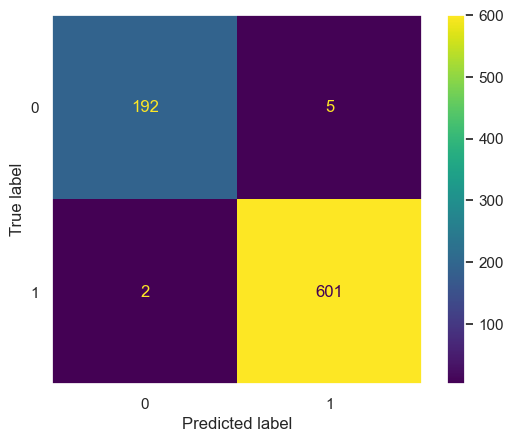

In [151]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

gs_log_preds = gs_log_model.predict(X_valid_features)
# confusion_matrix(y_valid, gs_model_preds)
ConfusionMatrixDisplay.from_estimator(estimator =gs_log_model,
                                      X=X_valid_features,
                                      y=Y_valid)

### Classification Report

In [152]:
report = classification_report(Y_valid, gs_log_preds, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.989691,0.974619,0.982097,197.00000
1,0.991749,0.996683,0.994210,603.00000
accuracy,0.991250,0.991250,0.991250,0.99125
macro avg,0.990720,0.985651,0.988154,800.00000
weighted avg,0.991242,0.991250,0.991227,800.00000


Our modelling is complete, we now preprocess the test data similar to that of the training and validation data and predict the `Group` undeer which each persion falls.

We see that there is only 53.7% accuracy of the model which says that, eithet the model we tried to fit isn't suitable or there would be some sort of issue with the data provided (insufficient feature variables, complexity of the data..etc.)

Let's predict the test result for the test data using the RandomForestClassification model that gave us the highest accuracy.

From the above model I have got acheived the model accuracy of about `99%` which is pretty good.

I apply this model on the test dataset and classigy the `MESSAGE` in test dataset to `Spam` or `Not Spam`.

## Test with the Test data

In [153]:
# Import the test data
test_data = pd.read_csv("Email Test Data.csv")
test_data.drop("Unnamed: 0",
              axis=1,
              inplace=True)
test_data.head()

,MESSAGE
0,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,ATTENTION: This is a MUST for ALL Computer Use...
2,This is a multi-part message in MIME format.\n...
3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,This is the bottom line. If you can GIVE AWAY...


### Preprocess the data

In [154]:
X_test = test_data["MESSAGE"]

In [158]:
# Transfrom the text data to categorical featues 
X_test_features = feature_extraction.transform(X_test)
X_test_features

<1000x51862 sparse matrix of type '<class 'numpy.float64'>'
	with 140395 stored elements in Compressed Sparse Row format>

### Predictions on Test data

In [160]:
X_test_predictions = gs_log_model.predict(X_test_features)
X_test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [161]:
test_predictions = pd.DataFrame(test_data)
test_predictions["CATEGORY"] = X_test_predictions

In [162]:
test_predictions = pd.DataFrame(test_data)
test_predictions["CATEGORY"] = X_test_predictions

In [163]:
test_predictions.head()

,MESSAGE,CATEGORY
0,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",0
1,ATTENTION: This is a MUST for ALL Computer Use...,0
2,This is a multi-part message in MIME format.\n...,0
3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,0
4,This is the bottom line. If you can GIVE AWAY...,0


In [164]:
predictions = pd.DataFrame(test_predictions["CATEGORY"].map({0:"Spam", 1:"Not Spam"}))
test_predictions["CATEGORY"]=predictions

In [166]:
test_predictions["CATEGORY"].value_counts()

CATEGORY
Spam        936
Not Spam     64
Name: count, dtype: int64

In [167]:
test_predictions

,MESSAGE,CATEGORY
0,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",Spam
1,ATTENTION: This is a MUST for ALL Computer Use...,Spam
2,This is a multi-part message in MIME format.\n...,Spam
3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,Spam
4,This is the bottom line. If you can GIVE AWAY...,Spam
...,...,...
995,"<HTML><BODY BGCOLOR=3D""#FFFFFF"">\n\n<table wid...",Spam
996,Long time no chat!\n\n\n\nHow have you been? I...,Spam
997,"\n\n\n\nChina's rapid economic growth, as rank...",Spam
998,"<html>\n\n\n\n<body>\n\n\n\n<font size=""2"" PTS...",Spam
